# Новые переменные, даты, применение функций

In [2]:
import pandas as pd

Снова работаем с *датасетом* про велосипеды.

In [9]:
bikes = pd.read_csv('data/BikeData.csv')
print(bikes.shape)

bikes["Total"] = bikes["Partner 1"] + bikes["Partner 2"]
bikes.head()

(8760, 12)


,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Total
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50,257
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80,219
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140,162
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105,148
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38,97


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Hour             8760 non-null   int64  
 2   Temperature      8581 non-null   float64
 3   Humidity         8760 non-null   int64  
 4   Wind speed       8760 non-null   float64
 5   Rainfall         8760 non-null   float64
 6   Snowfall         8760 non-null   float64
 7   Seasons          8760 non-null   object 
 8   Holiday          8760 non-null   object 
 9   Functioning Day  8760 non-null   object 
 10  Partner 1        8760 non-null   int64  
 11  Partner 2        8760 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 821.4+ KB


Применим метод, который мы видели раньше, `.describe()`, чтобы быстро получить важные расчёты и статистики для **числовых** колонок.

In [4]:
bikes.describe()

,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Partner 1,Partner 2
count,8760.000000,8581.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,12.878557,58.226256,1.724909,0.148687,0.075068,345.656507,350.925571
std,6.922582,11.955551,20.362413,1.036300,1.128193,0.436746,415.816299,425.687048
min,0.000000,-17.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,3.400000,42.000000,0.900000,0.000000,0.000000,57.000000,56.000000
50%,11.500000,13.700000,57.000000,1.500000,0.000000,0.000000,186.000000,182.000000
75%,17.250000,22.500000,74.000000,2.300000,0.000000,0.000000,487.000000,499.250000
max,23.000000,39.400000,98.000000,7.400000,35.000000,8.800000,3101.000000,3039.000000


## Создаем новые переменные

Часто при анализе данных полезно создавать новые, вторичные столбцы, на основе имеющихся.  

Здесь мы создаём столбец с общим количеством взятых в прокат велосипедов.

In [4]:
bikes['Total'] = bikes['Partner 1'] + bikes['Partner 2']

In [5]:
bikes.tail()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Total
8755,30/11/2018,19,4.2,34,2.6,0.0,0.0,Autumn,No Holiday,Yes,467,177,644
8756,30/11/2018,20,3.4,37,2.3,0.0,0.0,Autumn,No Holiday,Yes,296,63,359
8757,30/11/2018,21,2.6,39,0.3,0.0,0.0,Autumn,No Holiday,Yes,571,665,1236
8758,30/11/2018,22,2.1,41,1.0,0.0,0.0,Autumn,No Holiday,Yes,171,457,628
8759,30/11/2018,23,1.9,43,1.3,0.0,0.0,Autumn,No Holiday,Yes,442,401,843


### Даты

Нередко в датасетах нам оказываются доступны даты.
    В программировании такой тип данных, предусматривающий ещё и время, часто назван `datetime`.

Работа с датами может быть удобной, если использовать специальные методы pandas.

Чтобы перевести значения в колонке в специальный тип `datetime`, с которым потом удобнее работать, нужно из библиотеки `pandas` вызвать функцию `datetime`.

Но если запустить код ниже, то получим много предупреждений от библиотеки. 
     Формат, в котором в столбце была записана дата, мы не указали и она пытается разобраться сама.
     
Укажем, что наша дата в формате `DD/MM/YYYY` аргументом `dayfirst=True`

In [6]:
pd.to_datetime(bikes['Date'])

ValueError: time data "13/12/2017" doesn't match format "%m/%d/%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7]:
pd.to_datetime(bikes['Date'], dayfirst=True)

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

Обратите внимание на тип данных, это `datetime`.
    Из такой колонки теперь можно получать полезные вещи.



#### .dt и .str

Будет техническая тонкость, сперва понадобится написать `.dt`
    (точно так же можно писать `.str` на строковых колонках и применять затем методы строк).
    
Например, **месяц**:

In [23]:
pd.to_datetime(bikes['Date'], dayfirst=True).dt.month

0       12
1       12
2       12
3       12
4       12
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: Date, Length: 8760, dtype: int64

Сравните с `.str`:

In [11]:
bikes["Seasons"].str.startswith("Win")

0        True
1        True
2        True
3        True
4        True
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: Seasons, Length: 8760, dtype: bool

**Год `.year`** :

In [11]:
pd.to_datetime(bikes['Date'], dayfirst=True).dt.year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
8755    2018
8756    2018
8757    2018
8758    2018
8759    2018
Name: Date, Length: 8760, dtype: int64

**День недели `.day_name`** в эту дату!

In [12]:
pd.to_datetime(bikes['Date'], dayfirst=True).dt.day_name()

0       Friday
1       Friday
2       Friday
3       Friday
4       Friday
         ...  
8755    Friday
8756    Friday
8757    Friday
8758    Friday
8759    Friday
Name: Date, Length: 8760, dtype: object

(это случайность, тут не всё пятницы...)

Обновим, наконец, эту колонку в таблице

In [4]:
bikes['Date'] = pd.to_datetime(bikes['Date'], dayfirst=True)

In [14]:
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Total
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50,257
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80,219
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140,162
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105,148
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,No Holiday,Yes,467,177,644
8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,No Holiday,Yes,296,63,359
8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,No Holiday,Yes,571,665,1236
8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,No Holiday,Yes,171,457,628


Тип данных теперь `datetime`:

In [15]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Hour             8760 non-null   int64         
 2   Temperature      8581 non-null   float64       
 3   Humidity         8760 non-null   int64         
 4   Wind speed       8760 non-null   float64       
 5   Rainfall         8760 non-null   float64       
 6   Snowfall         8760 non-null   float64       
 7   Seasons          8760 non-null   object        
 8   Holiday          8760 non-null   object        
 9   Functioning Day  8760 non-null   object        
 10  Partner 1        8760 non-null   int64         
 11  Partner 2        8760 non-null   int64         
 12  Total            8760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 889.8+ KB


In [16]:
bikes[bikes['Date'].dt.year == 2017]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Total
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50,257
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80,219
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140,162
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105,148
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2017-12-31,19,0.0,31,2.2,0.0,0.0,Winter,Holiday,Yes,82,105,187
740,2017-12-31,20,-1.0,32,0.9,0.0,0.0,Winter,Holiday,Yes,93,91,184
741,2017-12-31,21,-1.6,35,1.0,0.0,0.0,Winter,Holiday,Yes,47,67,114
742,2017-12-31,22,-2.1,36,1.7,0.0,0.0,Winter,Holiday,Yes,108,143,251


Большинство наблюдений за часы и дни 2018 года:

In [17]:
bikes[bikes['Date'].dt.year == 2018].shape

(8016, 13)

In [18]:
bikes[bikes['Date'].dt.year == 2019].shape

(0, 12)

За счёт даты можем понимать день недели и фильтровать и анализировать данные по нему (хотя в таблице отдельно его не было!):

In [18]:
bikes[bikes['Date'].dt.day_name() == 'Tuesday']

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Total
96,2017-12-05,0,-6.1,42,2.6,0.0,0.0,Winter,No Holiday,Yes,46,170,216
97,2017-12-05,1,-6.5,41,2.8,0.0,0.0,Winter,No Holiday,Yes,50,85,135
98,2017-12-05,2,-6.8,41,2.5,0.0,0.0,Winter,No Holiday,Yes,29,104,133
99,2017-12-05,3,-6.9,39,2.0,0.0,0.0,Winter,No Holiday,Yes,39,8,47
100,2017-12-05,4,-7.2,34,3.0,0.0,0.0,Winter,No Holiday,Yes,18,22,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,2018-11-27,19,9.3,52,2.7,0.0,0.0,Autumn,No Holiday,Yes,49,666,715
8684,2018-11-27,20,8.3,39,1.6,0.0,0.0,Autumn,No Holiday,Yes,492,413,905
8685,2018-11-27,21,7.5,35,1.8,0.0,0.0,Autumn,No Holiday,Yes,529,529,1058
8686,2018-11-27,22,6.6,33,2.1,0.0,0.0,Autumn,No Holiday,Yes,18,629,647


Знает ли он какой день был 32 июня? А 29 февраля 2018 года?

In [19]:
df_dates = pd.DataFrame()
df_dates['dates'] = ['32/06/2020', '29/02/2018']
df_dates

,dates
0,32/06/2020
1,29/02/2018


In [20]:
pd.to_datetime(df_dates['dates'], dayfirst=True).dt.day_name()

C:\Users\фвьшт\AppData\Local\Temp\ipykernel_4072\91179059.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df_dates['dates'], dayfirst=True).dt.day_name()


DateParseError: Invalid date specified (32/6), at position 0

Нет, не допускает некорректных дат.

Отфильтруем данные и поймём, сколько в среднем брали велосипедов в воскресенье:

In [21]:
bikes[bikes['Date'].dt.day_name() == 'Sunday']

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Total
48,2017-12-03,0,4.0,58,1.4,0.0,0.0,Winter,No Holiday,Yes,208,69,277
49,2017-12-03,1,3.9,69,1.7,0.0,0.0,Winter,No Holiday,Yes,100,165,265
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,No Holiday,Yes,208,54,262
51,2017-12-03,3,3.4,71,1.6,0.5,0.0,Winter,No Holiday,Yes,39,39,78
52,2017-12-03,4,3.5,73,1.0,0.0,0.0,Winter,No Holiday,Yes,74,21,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2018-11-25,19,6.3,73,1.1,0.0,0.4,Autumn,No Holiday,Yes,317,271,588
8636,2018-11-25,20,5.5,77,0.7,0.0,0.4,Autumn,No Holiday,Yes,252,105,357
8637,2018-11-25,21,4.7,81,1.0,0.0,0.4,Autumn,No Holiday,Yes,114,305,419
8638,2018-11-25,22,4.2,82,0.9,0.0,0.4,Autumn,No Holiday,Yes,283,405,688


#### Тренировка

Сколько в среднем берут велосипедов в час в какой день недели?
- отфильтруйте и найдите среднее для конкретных дней недели
- постройте график — ящики с усами

In [28]:
# ваш код


Monday: 720.7219551282051
Friday: 745.1517295597484
Saturday: 706.8357371794872


<Axes: title={'center': 'Total'}, xlabel='day_name'>

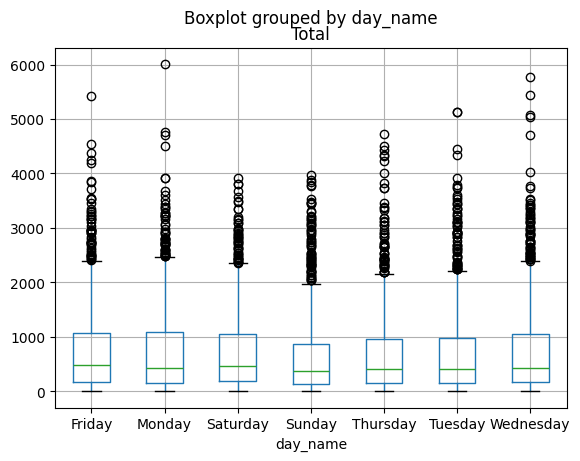

In [23]:
bikes["day_name"] = bikes["Date"].dt.day_name()
bikes.boxplot("Total", by="day_name")

### Линейный график на основе дат

In [10]:
bikes.groupby("Date")["Total"].mean()

Date
01/01/2018     177.458333
01/02/2018     262.666667
01/03/2018     232.583333
01/04/2018     785.041667
01/05/2018    1239.083333
                 ...     
31/05/2018    1265.875000
31/07/2018     947.041667
31/08/2018    1270.458333
31/10/2018     885.416667
31/12/2017     136.041667
Name: Total, Length: 365, dtype: float64

<Axes: xlabel='Date'>

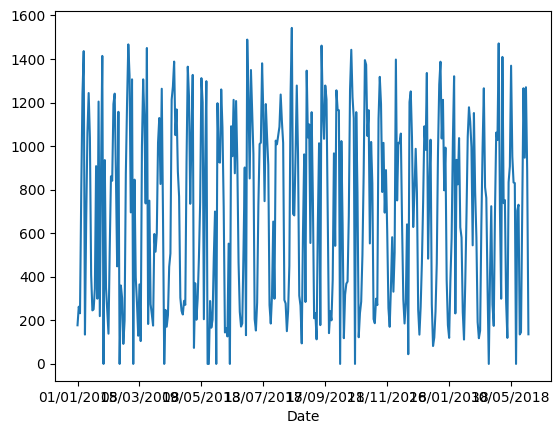

In [12]:
bikes.groupby("Date")["Total"].mean().plot.line()

#### Превращение в bool на основе условия

Пусть `'Functioning Day'` будет `True` / `False`

In [31]:
bikes[bikes['Functioning Day'] == 'No'].shape

(295, 13)

In [30]:
bikes['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

Чтобы `Yes` стало `True`, а всё остальное (по сути лишь `No`) стало False, можно просто сделать условие `== "Yes"`:

In [24]:
bikes['Functioning Day'] = (bikes['Functioning Day'] == 'Yes')

In [25]:
bikes["Functioning Day"].sum()

8465

In [36]:
bikes["Functioning Day"]

0       True
1       True
2       True
3       True
4       True
        ... 
8755    True
8756    True
8757    True
8758    True
8759    True
Name: Functioning Day, Length: 8760, dtype: bool

In [37]:
(~bikes["Functioning Day"]).sum()

295

In [39]:
len(bikes) - bikes["Functioning Day"].sum()

295

То же сделаем с переменной `Holiday` &mdash; праздничный день или нет:

In [57]:
bikes['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [58]:
bikes['Holiday'] = (bikes['Holiday'] == 'Holiday')

In [59]:
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Rental Count
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,False,True,207,50,257
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,False,True,139,80,219
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,False,True,22,140,162
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,False,True,43,105,148
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,False,True,59,38,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,False,True,467,177,644
8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,False,True,296,63,359
8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,False,True,571,665,1236
8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,False,True,171,457,628


Когда прокаты не работали, велосипеды брали?

In [41]:
bikes[~bikes['Functioning Day']]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Rental Count
3144,2018-04-11,0,14.4,82,4.6,0.0,0.0,Spring,False,False,0,0,0
3145,2018-04-11,1,13.6,81,3.6,0.0,0.0,Spring,False,False,0,0,0
3146,2018-04-11,2,NaN,80,3.9,0.0,0.0,Spring,False,False,0,0,0
3147,2018-04-11,3,11.6,81,3.1,0.0,0.0,Spring,False,False,0,0,0
3148,2018-04-11,4,10.2,83,3.5,0.0,0.0,Spring,False,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,19,11.9,71,2.7,0.0,0.0,Autumn,False,False,0,0,0
8252,2018-11-09,20,11.9,72,2.5,0.0,0.0,Autumn,False,False,0,0,0
8253,2018-11-09,21,11.4,74,1.9,0.0,0.0,Autumn,False,False,0,0,0
8254,2018-11-09,22,11.2,75,1.7,0.0,0.0,Autumn,False,False,0,0,0


In [45]:
bikes[(~bikes['Functioning Day']) &
      (bikes['Total'] > 0)]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Rental Count


In [26]:
bikes[~bikes['Functioning Day']]["Total"].mean()

0.0

Нет, не брали, прокат же не работал...

Может выглядеть странно, но так мы проверили, что правильно поняли данные и что они корректны. 

### Вспоминаем про функции

Мы использовали много функций.

- встроенных в `python`: `round`, `int`, `print`
- из пакета numpy: `np.mean`, `np.std`
- из пакета pandas: `pd.DataFrame`, `pd.cut`


In [80]:
print(round(0.5))
print(round(1.5))
print(round(2.5))
print(round(3.5))
print(round(4.5))

0
2
2
4
4


Оказывается, что функции можно создать самому!

Функция — код, который можно использовать повторно сколько угодно раз

Функции могут что-то принимать на вход (`print`, `round`) и выдавать на выход (`round`).  
  **NB**: выдавать на выход, т.е. возвращать, значит, что когда мы пишем `result = ФУНКЦИЯ()`, то в `result` что-то будет осмысленное (а не `None`)

In [28]:
result = print("Вася")

Вася


In [30]:
print(result)

None


In [31]:
result = round(14.551)
print(result)

15


Напишем функцию самостоятельно!

In [81]:
def currency_converter(rub):
    return round(rub / 74.73, 2)

currency_converter(1000)

13.38

In [46]:
amounts = [1000, 2000, 4214, 12321]
print(list(map(currency_converter, amounts)))

[13.38, 26.76, 56.39, 164.87]


In [47]:
print(list(map(lambda x: round(x / 74.73, 2), amounts)))

[13.38, 26.76, 56.39, 164.87]


`lambda` - ключевое слово для создания одноразовой безымянной функции

Записывается так: `lambda <переменные> : <тело функции>`

Тело функции это одно выражение, которое что-то выдаёт.
    При этом писать `return` не нужно.

Бывает однострочный `if`, который всегда с `else`, похожий на `Если` в Excel:
    
    <результат_при_True> if <условие> else <результат_при_False>

In [83]:
mynum = int(input())

comment = "со смыслом..." if mynum == 42 else "ок"

print(comment)

 51514


ок


Оно может использоваться в лямбдах:

In [51]:
print(list(map(lambda x: 0 if x < 3000 else 1, amounts)))

[0, 0, 1, 1]


In [52]:
bikes['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0).sum()

0

In [97]:
df = pd.DataFrame()

df["rubles"] = [1000, 2000, 4214, 12321]

df["dollars"] = df.apply(currency_converter)
df

,rubles,dollars
0,1000,13.38
1,2000,26.76
2,4214,56.39
3,12321,164.87


In [55]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Rental Count
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,False,True,207,50,257
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,False,True,139,80,219
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,False,True,22,140,162
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,False,True,43,105,148
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,False,True,59,38,97


Создадим столбик для нормальной влажности.

In [92]:
bikes['Normal Humidity'] = bikes['Humidity'].apply(lambda x: 1 if x in range(40,61) else 0)

In [93]:
bikes

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Rental Count,Normal Humidity
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,False,True,207,50,257,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,False,True,139,80,219,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,False,True,22,140,162,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,False,True,43,105,148,1
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,False,True,59,38,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,0.0,0.0,Autumn,False,True,467,177,644,0
8756,2018-11-30,20,3.4,37,2.3,0.0,0.0,Autumn,False,True,296,63,359,0
8757,2018-11-30,21,2.6,39,0.3,0.0,0.0,Autumn,False,True,571,665,1236,0
8758,2018-11-30,22,2.1,41,1.0,0.0,0.0,Autumn,False,True,171,457,628,1


И характеристики температуры.

In [94]:
def get_temp_cat(temp):
    if temp < 0:
        return 'Freezing'
    elif temp < 15:
        return 'Chilly'
    elif temp < 26:
        return 'Nice'
    elif temp >= 26:
        return 'Hot'
    else:
        return temp

In [95]:
bikes['Temperature Category'] = bikes['Temperature'].apply(get_temp_cat)

In [96]:
bikes[['Temperature Category', 'Temperature']].tail()

,Temperature Category,Temperature
8755,Chilly,4.2
8756,Chilly,3.4
8757,Chilly,2.6
8758,Chilly,2.1
8759,Chilly,1.9


In [61]:
def windy(speed):
    if speed < 5:
        return False
    else:
        return True
    
bikes['Windy'] = bikes['Wind speed'].apply(windy)

In [62]:
bikes['Windy'].unique()

array([False,  True])

Можно в явном виде указать это как специальный тип колонок, категориальную величину.

In [64]:
bikes['Temperature Category'] = pd.Categorical(bikes['Temperature Category'])

In [65]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   bool          
 9   Functioning Day       8760 non-null   bool          
 10  Partner 1             8760 non-null   int64         
 11  Partner 2             8760 non-null   int64         
 12  Rental Count          8760 non-null   int64         
 13  Normal Humidity   

In [66]:
bikes['Temperature Category'].cat.codes

0       1
1       1
2       1
3       1
4       1
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Length: 8760, dtype: int8

In [67]:
bikes['Temperature Category'].cat.categories

Index(['Chilly', 'Freezing', 'Hot', 'Nice'], dtype='object')

`np.where()`

In [68]:
import numpy as np

bikes['Good Weather'] = np.where(
    (bikes['Temperature Category'] == 'Nice')
    & (bikes['Normal Humidity'] == 1)
    & (bikes['Wind speed'] <= 5.4)
    & (bikes['Snowfall'] == 0)
    & (bikes['Rainfall'] == 0),
    1, 0
)

(конечно, всё можно было сделать с `DataFrame`'ом pandas, раз у нас таблица, но это полезно когда просто массивы numpy)

In [69]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   bool          
 9   Functioning Day       8760 non-null   bool          
 10  Partner 1             8760 non-null   int64         
 11  Partner 2             8760 non-null   int64         
 12  Rental Count          8760 non-null   int64         
 13  Normal Humidity   

## Заполняем пропуски

In [13]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Hour             8760 non-null   int64  
 2   Temperature      8581 non-null   float64
 3   Humidity         8760 non-null   int64  
 4   Wind speed       8760 non-null   float64
 5   Rainfall         8760 non-null   float64
 6   Snowfall         8760 non-null   float64
 7   Seasons          8760 non-null   object 
 8   Holiday          8760 non-null   object 
 9   Functioning Day  8760 non-null   object 
 10  Partner 1        8760 non-null   int64  
 11  Partner 2        8760 non-null   int64  
 12  Total            8760 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 889.8+ KB


Температура иногда пропущена

In [14]:
bikes['Temperature'].fillna(bikes['Temperature'].median())

0      -5.2
1      -5.5
2      -6.0
3      -6.2
4      -6.0
       ... 
8755    4.2
8756    3.4
8757    2.6
8758    2.1
8759    1.9
Name: Temperature, Length: 8760, dtype: float64

Заполнить отсутствующие температуры средней температурой за день — высший пилотаж!

In [15]:
bikes.groupby("Date", sort=False)['Temperature'].apply(
    lambda x: x.fillna(x.mean())
)

Date            
01/12/2017  0      -5.2
            1      -5.5
            2      -6.0
            3      -6.2
            4      -6.0
                   ... 
30/11/2018  8755    4.2
            8756    3.4
            8757    2.6
            8758    2.1
            8759    1.9
Name: Temperature, Length: 8760, dtype: float64

## Разное


**Удаление**

Удаляем столбцы

In [70]:
bikes = bikes.drop('Partner 1', axis=1) # по умолчанию (axis=0) удаляет по индексу

In [71]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 2,Rental Count,Normal Humidity,Temperature Category,Windy,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,False,True,50,257,0,Freezing,False,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,False,True,80,219,0,Freezing,False,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,False,True,140,162,0,Freezing,False,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,False,True,105,148,1,Freezing,False,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,False,True,38,97,0,Freezing,False,0


In [72]:
del bikes['Partner 2'] # del - ключевое слово

In [73]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   bool          
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8581 non-null   category      
 13  Windy             

### Сохраним данные

In [74]:
bikes.to_csv('data/BikesDataVars.csv', index=False)

Считает не совсем в тех типах... (если не указать специально)

In [75]:
df_csv = pd.read_csv('data/BikesDataVars.csv')
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  8760 non-null   object 
 1   Hour                  8760 non-null   int64  
 2   Temperature           8581 non-null   float64
 3   Humidity              8760 non-null   int64  
 4   Wind speed            8760 non-null   float64
 5   Rainfall              8760 non-null   float64
 6   Snowfall              8760 non-null   float64
 7   Seasons               8760 non-null   object 
 8   Holiday               8760 non-null   bool   
 9   Functioning Day       8760 non-null   bool   
 10  Rental Count          8760 non-null   int64  
 11  Normal Humidity       8760 non-null   int64  
 12  Temperature Category  8581 non-null   object 
 13  Windy                 8760 non-null   bool   
 14  Good Weather          8760 non-null   int64  
dtypes: bool(3), float64(4

Pandas может работать с `excel`, если стоит дополнительный помощник на питоне, `openpyxl`.
     Если не установлен, то можно установить:

In [ ]:
# !pip install openpyxl

In [76]:
bikes.to_excel('data/BikesDataVars.xlsx', index=False)

In [77]:
df_xlsx = pd.read_excel('data/BikesDataVars.xlsx', index_col=False)
df_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   bool          
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8581 non-null   object        
 13  Windy             

In [76]:
bikes.to_pickle('data/BikesDataVars.pkl')

In [77]:
df_pkl = pd.read_pickle('data/BikesDataVars.pkl')

In [78]:
df_pkl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   bool          
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8581 non-null   category      
 13  Windy             